In [43]:
#a)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#for f)
from scipy.stats import norm
import numpy as np

In [44]:
df = pd.read_csv('sample_data/Q1_Dataset.csv')

df = df.drop_duplicates()
duplicate_rows = df[df.duplicated()]
print("Duplicate rows found:", len(duplicate_rows))

Duplicate rows found: 0


In [45]:
#fixing the capitalisation (Standardization)
df["Neighborhood"] = df["Neighborhood"].str.title()

#Calculate average rental price by the neighborhood
avg_rent_by_neighborhood = df.groupby('Neighborhood')['Rental_Price'].mean().sort_values(ascending=False)

#printing the results
avg_rent_by_neighborhood


,Rental_Price
Neighborhood,
Downtown,4617.087753
Uptown,4008.781321
Midtown,4006.492098
Suburbs,3746.313770


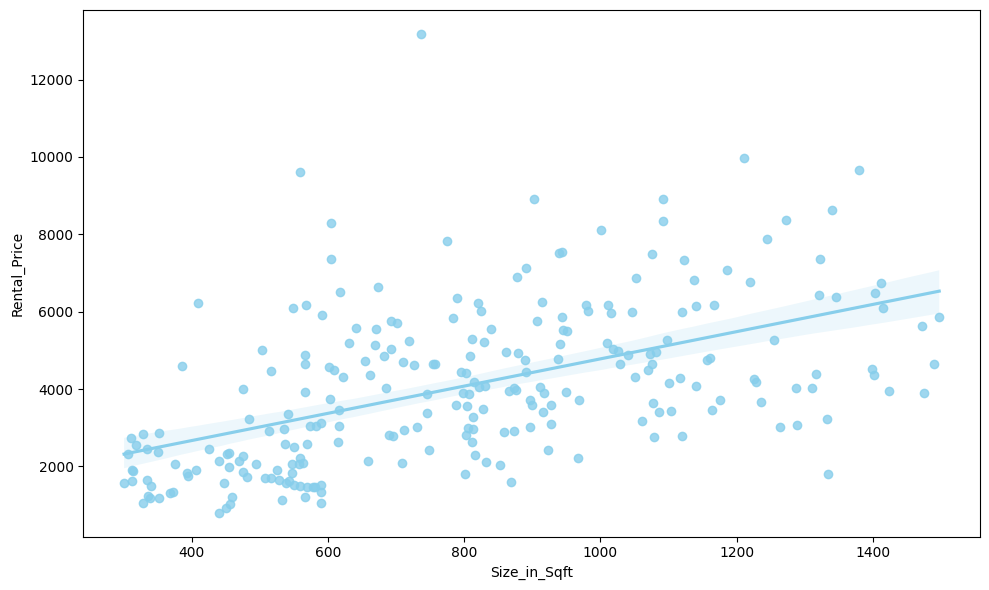

In [46]:
#---------------------------------------------------------------------------------------------------#
#b)
#plotting rental price vs size in sqft
plt.figure(figsize=(10, 6))
# sns.lineplot(x='Size_in_Sqft', y='Rental_Price', data=df, color="teal")
# plt.title('Rental Price vs Size in Sqft')
# plt.xlabel('Size in Sqft')
# plt.ylabel('Rental Price')
# plt.grid(True)
#getting the regression line
sns.regplot(x='Size_in_Sqft', y='Rental_Price', data=df, scatter=True, color='skyblue')

plt.tight_layout()
plt.show()

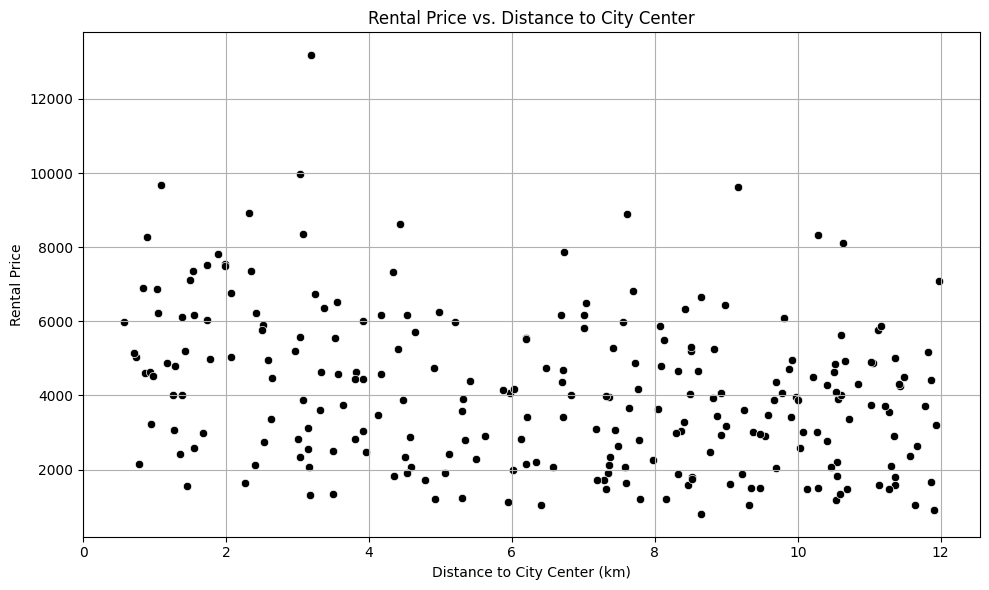

In [47]:
#---------------------------------------------------------------------------------------------------#
#c)no

# Plot: Rental Price vs. Distance to City Center
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="Distance_to_City_Center", y="Rental_Price", color="black")
plt.title("Rental Price vs. Distance to City Center")
plt.xlabel("Distance to City Center (km)")
plt.ylabel("Rental Price")
plt.grid(True)
plt.tight_layout()
plt.show()

In [48]:
#---------------------------------------------------------------------------------------------------#
#d)
# Standardize the Furnished column
df["Furnished"] = df["Furnished"].str.title()

# Calculate average rental price based on furnished status
avg_rent_by_furnishing = df.groupby("Furnished")["Rental_Price"].mean()

print(avg_rent_by_furnishing)

Furnished
Furnished      3718.839446
Unfurnished    4817.971657
Name: Rental_Price, dtype: float64


<ipython-input-49-9cf30775904c>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_rent_by_building, x="Building_Type", y="Rental_Price", palette="muted")


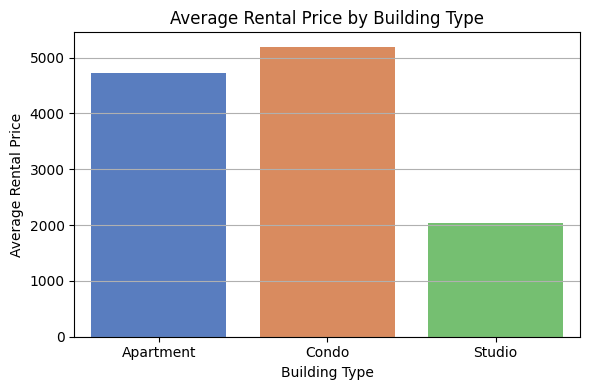

In [49]:
#---------------------------------------------------------------------------------------------------#
#e)
df["Building_Type"] = df["Building_Type"].str.title()

# Calculate average rental price by building type
avg_rent_by_building = df.groupby("Building_Type")["Rental_Price"].mean().reset_index()

# Plot the bar chart
plt.figure(figsize=(6, 4))
sns.barplot(data=avg_rent_by_building, x="Building_Type", y="Rental_Price", palette="muted")
plt.title("Average Rental Price by Building Type")
plt.xlabel("Building Type")
plt.ylabel("Average Rental Price")
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

In [50]:
#---------------------------------------------------------------------------------------------------#
#f)

# Given rental prices in USD (as provided)
rental_prices_usd =df[df['Neighborhood'] == 'Downtown']['Rental_Price']


# Conversion rate (1 USD = Rs 304)
conversion_rate = 304.00

# Convert USD prices to Rs
rental_prices_rs = np.array(rental_prices_usd) * conversion_rate

# Create a DataFrame to work with
df_2 = pd.DataFrame(rental_prices_rs, columns=['Rental_Price_Rs'])

# Calculate mean and standard deviation
mu = df_2['Rental_Price_Rs'].mean()
sigma = df_2['Rental_Price_Rs'].std()

# Threshold for Rs 500,000
threshold = 500000

# Calculate the Z-score
z_score = (threshold - mu) / sigma

# Calculate the probability using the Z-score
probability = norm.cdf(z_score)

# Output the results
print(f"Mean of rental prices: Rs {mu:.2f}")
print(f"Standard deviation of rental prices: Rs {sigma:.2f}")
print(f"Z-score for threshold Rs {threshold}: {z_score:.2f}")
print(f"Probability of finding an apartment below Rs 500,000: {probability:.4f}")


Mean of rental prices: Rs 1403594.68
Standard deviation of rental prices: Rs 702910.09
Z-score for threshold Rs 500000: -1.29
Probability of finding an apartment below Rs 500,000: 0.0993


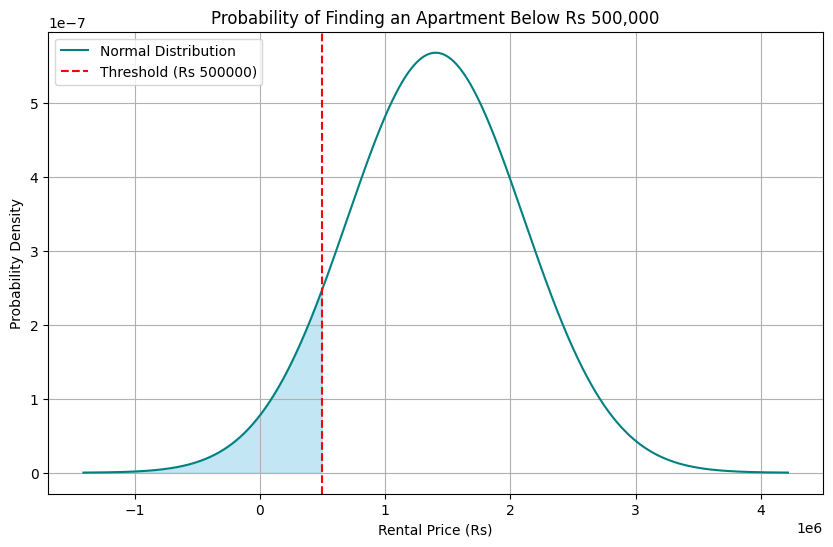

In [51]:
x = np.linspace(mu - 4 * sigma, mu + 4 * sigma, 1000)
y = norm.pdf(x, mu, sigma)

# Plotting the distribution
plt.figure(figsize=(10, 6))
plt.plot(x, y, label="Normal Distribution", color='teal')

# Fill the area for the probability (area to the left of the threshold)
plt.fill_between(x, 0, y, where=(x <= threshold), color='skyblue', alpha=0.5)

# Add a vertical line for the threshold
plt.axvline(threshold, color='red', linestyle='--', label=f'Threshold (Rs {threshold})')

# Labels and title
plt.title('Probability of Finding an Apartment Below Rs 500,000')
plt.xlabel('Rental Price (Rs)')
plt.ylabel('Probability Density')
plt.legend(loc='upper left')

# Show the plot
plt.grid(True)
plt.show()